# Data Analytics Project - Preprocessing

In [1]:
# importing required libraries
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint

# Pair 1 - Bajaj Auto and Hero Motoco

In [2]:
bajaj_df = pd.read_csv("../../Storage/Companies_with_names_exchange/BAJAJ-AUTONSE.csv", index_col=[0])

In [3]:
# Daily stock prices of Bajaj-Auto company
bajaj_df.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
Date,,,,,,,,
2017-01-02,2654.300049,2552.000000,2642.699951,2598.500000,323342.0,2336.084473,BAJAJ-AUTO,NSE
2017-01-03,2632.199951,2561.449951,2594.000000,2619.199951,420196.0,2354.694336,BAJAJ-AUTO,NSE
2017-01-04,2698.550049,2615.949951,2625.199951,2684.100098,343922.0,2413.040283,BAJAJ-AUTO,NSE
2017-01-05,2730.000000,2685.000000,2694.000000,2723.350098,188686.0,2448.326416,BAJAJ-AUTO,NSE
2017-01-06,2739.899902,2696.699951,2721.000000,2707.350098,159484.0,2433.942383,BAJAJ-AUTO,NSE


In [4]:
bajaj_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000
mean,2933.338442,2870.532615,2903.885661,2901.133286,4.125498e+05,2688.151111
std,199.507671,199.272185,200.040677,199.000689,3.524985e+05,192.588337
min,2498.699951,2420.000000,2455.000000,2463.850098,2.070700e+04,2316.912354
25%,2797.724976,2735.412537,2769.862488,2765.862488,2.362490e+05,2541.598999
50%,2887.500000,2831.125000,2855.625000,2856.275024,3.241135e+05,2636.790649
75%,3058.000000,2995.400024,3029.000000,3027.287476,4.704418e+05,2825.654358
max,3468.350098,3341.100098,3419.000000,3412.949951,4.976986e+06,3130.413818


In [5]:
hero_df = pd.read_csv("../../Storage/Companies_with_names_exchange/HEROMOTOCONSE.csv", index_col=[0])

In [6]:
hero_df.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
Date,,,,,,,,
2017-01-02,3068.949951,2992.550049,3042.000000,3030.550049,213654.0,2625.101074,HEROMOTOCO,NSE
2017-01-03,3016.149902,2962.550049,2978.000000,2986.550049,454277.0,2586.987549,HEROMOTOCO,NSE
2017-01-04,3017.300049,2971.000000,2999.000000,3004.899902,396816.0,2602.882568,HEROMOTOCO,NSE
2017-01-05,3083.800049,3012.949951,3034.899902,3071.750000,383925.0,2660.788574,HEROMOTOCO,NSE
2017-01-06,3119.000000,3052.000000,3085.000000,3067.550049,266915.0,2657.150635,HEROMOTOCO,NSE


In [7]:
hero_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000
mean,3230.833686,3157.948378,3198.677105,3192.535869,5.346487e+05,2902.196677
std,475.870428,478.524124,477.823200,477.338815,4.302599e+05,365.854808
min,2320.000000,2225.600098,2270.000000,2258.800049,2.421700e+04,2176.742188
25%,2761.474976,2677.750000,2730.000000,2713.312439,2.731308e+05,2572.505981
50%,3275.400024,3201.000000,3230.000000,3227.900024,4.101565e+05,2891.024536
75%,3670.724976,3610.125000,3650.125000,3645.087463,6.799525e+05,3254.423096
max,4091.949951,3995.000000,4084.000000,4048.949951,5.531848e+06,3593.912354


#### Extracting the Adjacent close prices of both stocks to graph them

In [8]:
# Adjacent close prices of bajaj
bajaj_close = bajaj_df.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Company', 'Exchange'])
bajaj_close = bajaj_close.rename(columns={'Close': 'Bajaj_Close'})
bajaj_close.head()

,Bajaj_Close
Date,
2017-01-02,2598.500000
2017-01-03,2619.199951
2017-01-04,2684.100098
2017-01-05,2723.350098
2017-01-06,2707.350098


In [9]:
# Adjacent close prices of hero
hero_close = hero_df.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Company', 'Exchange'])
hero_close = hero_close.rename(columns={'Close': 'Hero_Close'})
hero_close.head()

,Hero_Close
Date,
2017-01-02,3030.550049
2017-01-03,2986.550049
2017-01-04,3004.899902
2017-01-05,3071.750000
2017-01-06,3067.550049


#### Concatinating the extracted data to form a single df

In [10]:
pair1_df = hero_close.join(bajaj_close)
pair1_df.head()

,Hero_Close,Bajaj_Close
Date,,
2017-01-02,3030.550049,2598.500000
2017-01-03,2986.550049,2619.199951
2017-01-04,3004.899902,2684.100098
2017-01-05,3071.750000,2723.350098
2017-01-06,3067.550049,2707.350098


In [11]:
pair1_df = pair1_df.reset_index()
pair1_df.head()

,Date,Hero_Close,Bajaj_Close
0,2017-01-02,3030.550049,2598.500000
1,2017-01-03,2986.550049,2619.199951
2,2017-01-04,3004.899902,2684.100098
3,2017-01-05,3071.750000,2723.350098
4,2017-01-06,3067.550049,2707.350098


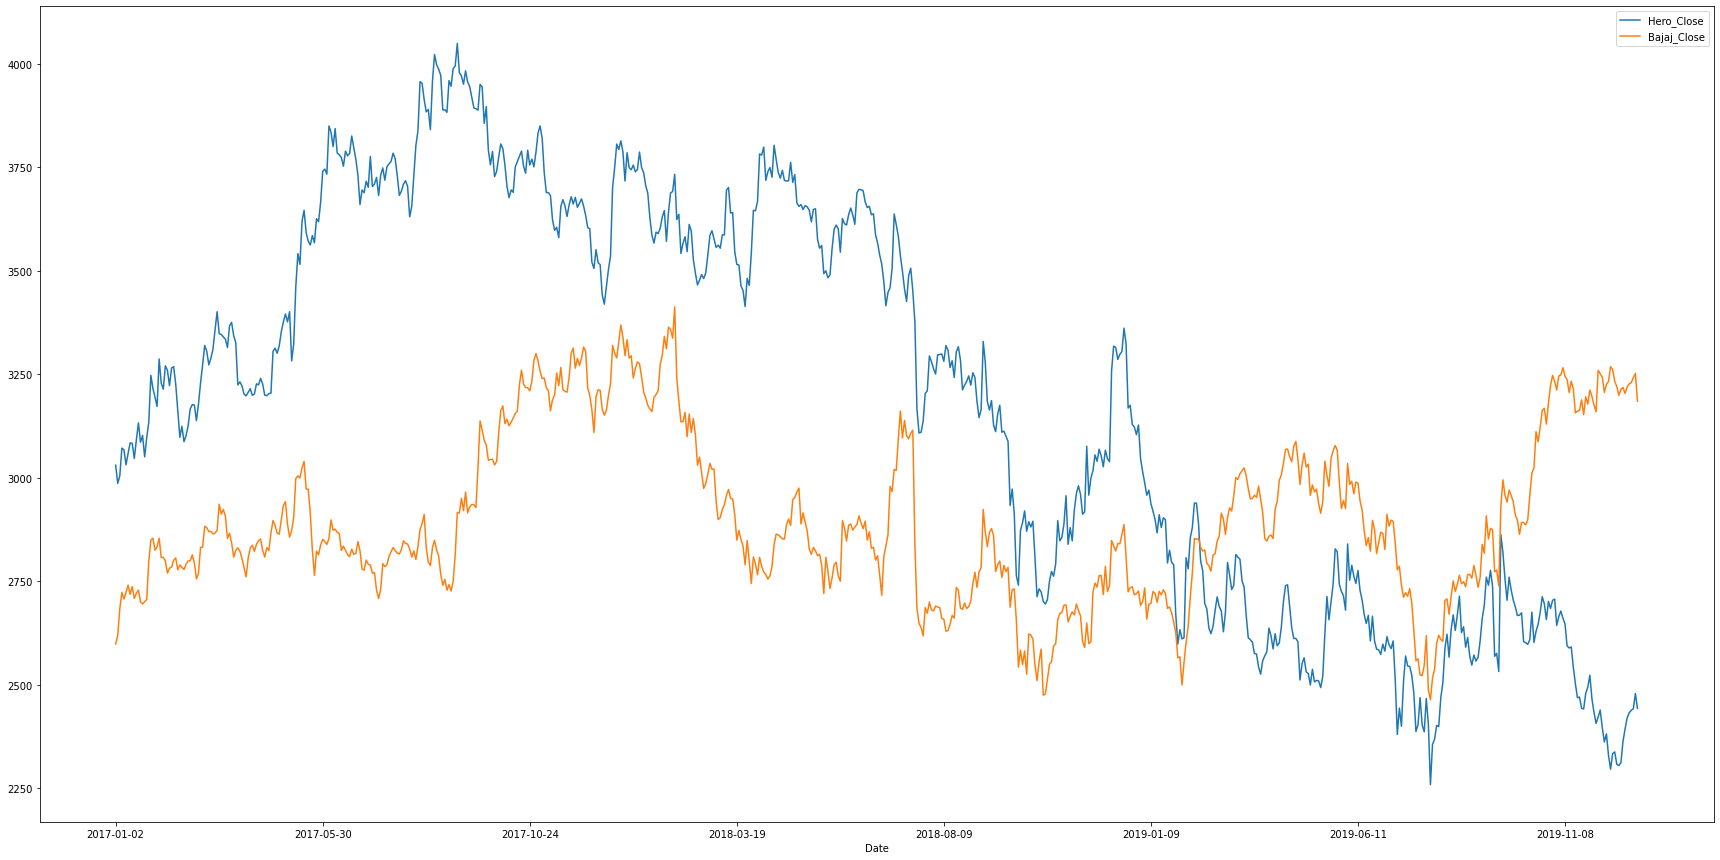

In [12]:
pair1_df.plot(x='Date', y=['Hero_Close', 'Bajaj_Close'], figsize=(30,15))

In [13]:
pair1_df.corr()

,Hero_Close,Bajaj_Close
Hero_Close,1.000000,0.188249
Bajaj_Close,0.188249,1.000000


- We can see that over 3 years, there is very little correlation between the 2 stock pairs

In [14]:
score, pvalue, _ = coint(pair1_df["Hero_Close"], pair1_df["Bajaj_Close"])
pvalue

0.9638760502104784

In [15]:
# taking a slice of the df
pair1_df = pair1_df[pair1_df['Date'] >= "2018-09-09"]
pair1_df = pair1_df[pair1_df['Date'] <= "2019-01-09"]
pair1_df.tail()

,Date,Hero_Close,Bajaj_Close
496,2019-01-03,3014.649902,2701.350098
497,2019-01-04,2987.850098,2734.199951
498,2019-01-07,2957.949951,2658.550049
499,2019-01-08,2970.300049,2694.850098
500,2019-01-09,2937.449951,2696.899902


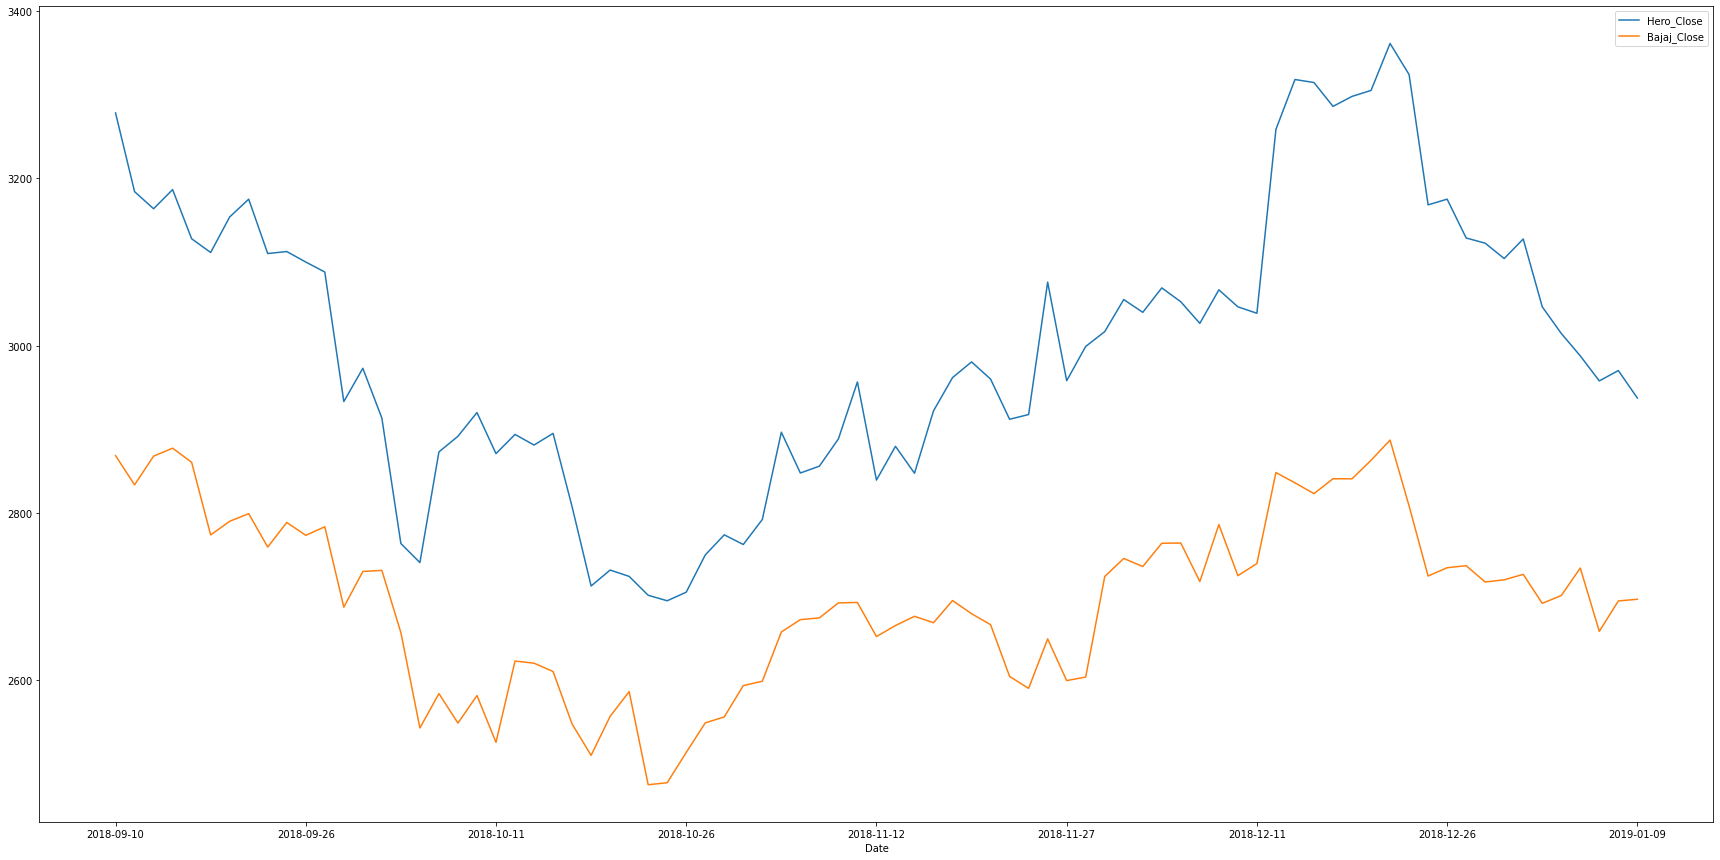

In [16]:
pair1_df.plot(x='Date', y=['Hero_Close', 'Bajaj_Close'], figsize=(30,15))

In [17]:
pair1_df.corr()

,Hero_Close,Bajaj_Close
Hero_Close,1.000000,0.899826
Bajaj_Close,0.899826,1.000000


In [18]:
score, pvalue, _ = coint(pair1_df["Hero_Close"], pair1_df["Bajaj_Close"])
pvalue

0.0434492439863655

### Spread Calculation

In [19]:
pair1_df["Spread"] = pair1_df["Hero_Close"] - pair1_df["Bajaj_Close"]
pair1_df.head()

,Date,Hero_Close,Bajaj_Close,Spread
420,2018-09-10,3278.300049,2868.600098,409.699951
421,2018-09-11,3184.199951,2833.699951,350.500000
422,2018-09-12,3163.750000,2867.949951,295.800049
423,2018-09-14,3186.649902,2877.500000,309.149902
424,2018-09-17,3127.899902,2860.649902,267.250000


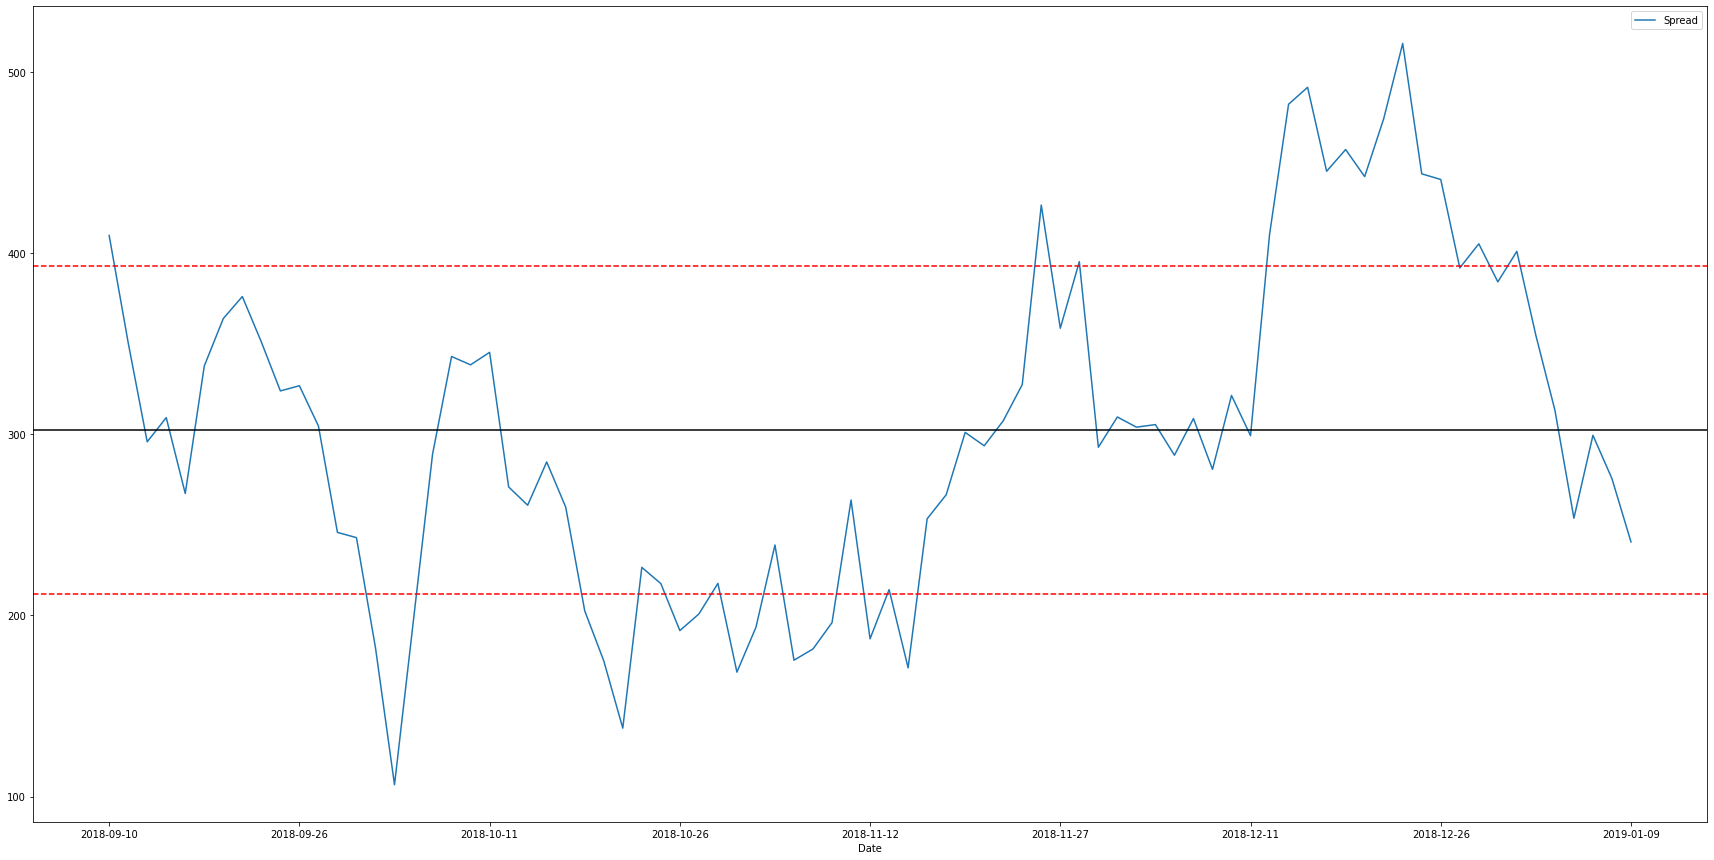

In [20]:
pair1_spread_mean = pair1_df.Spread.mean()
spread_std = pair1_df.Spread.std()

pair1_spread_plt = pair1_df.plot(x="Date", y=["Spread"], figsize=(30,15))

pair1_spread_plt.axhline(pair1_spread_mean, c='black')
pair1_spread_plt.axhline(pair1_spread_mean + spread_std, c='red', ls = "--")
pair1_spread_plt.axhline(pair1_spread_mean - spread_std, c='red', ls = "--")


### z-score Calculation of spread

In [21]:
def zscore(data):
    return (data - data.mean())/np.std(data)

In [22]:
pair1_df["zscore"] = zscore(pair1_df["Spread"])
pair1_df.head()

,Date,Hero_Close,Bajaj_Close,Spread,zscore
420,2018-09-10,3278.300049,2868.600098,409.699951,1.190924
421,2018-09-11,3184.199951,2833.699951,350.500000,0.533292
422,2018-09-12,3163.750000,2867.949951,295.800049,-0.074352
423,2018-09-14,3186.649902,2877.500000,309.149902,0.073947
424,2018-09-17,3127.899902,2860.649902,267.250000,-0.391505


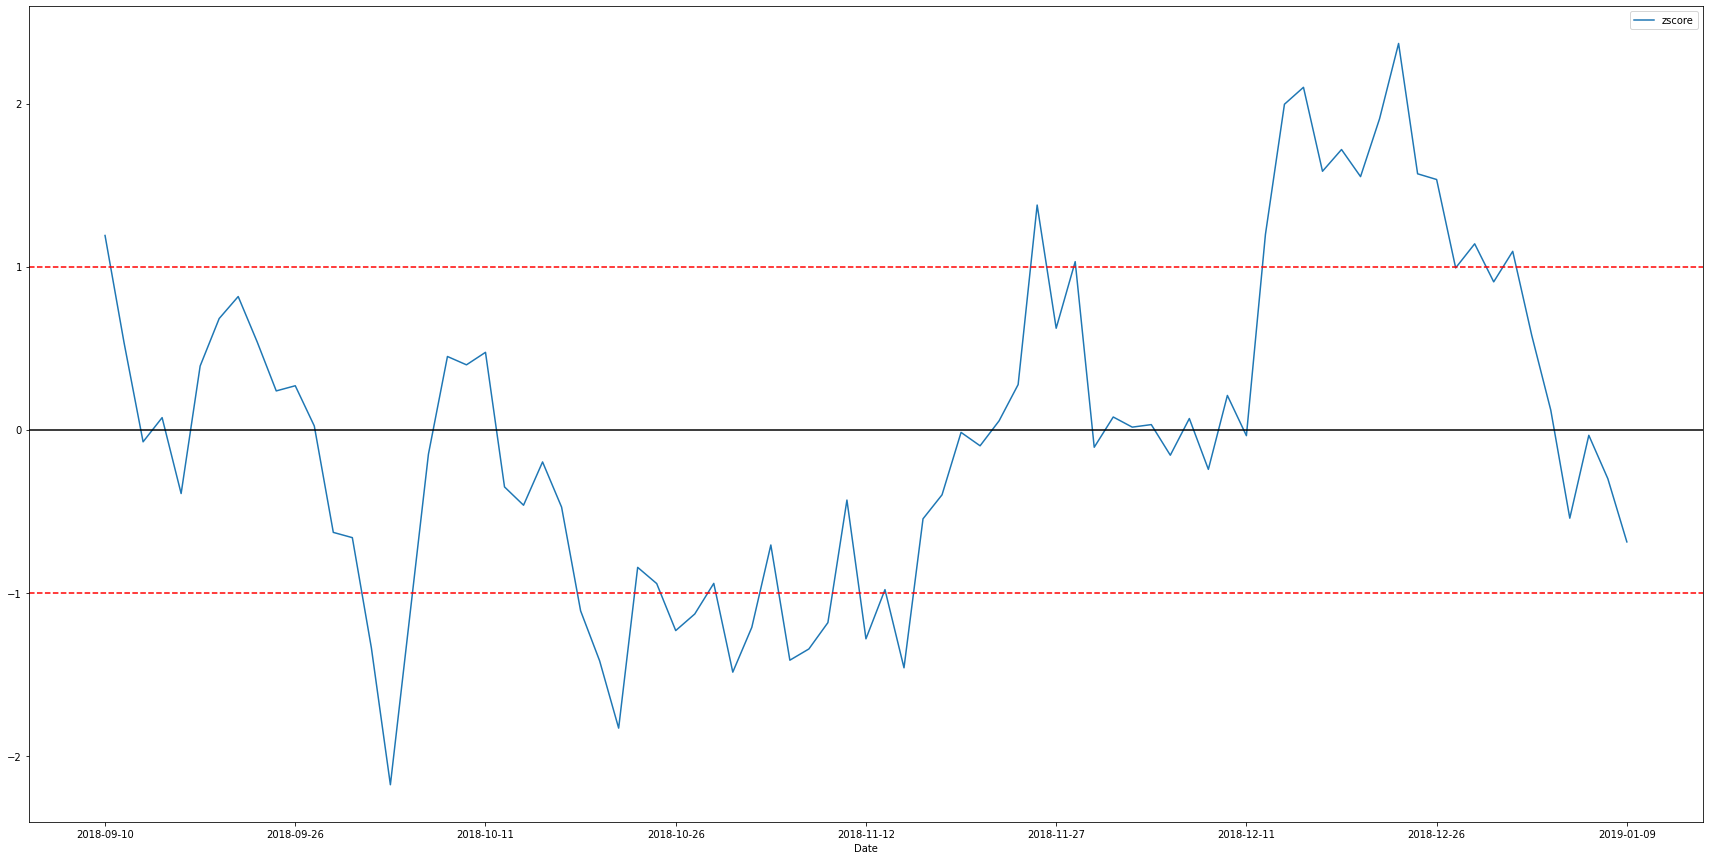

In [23]:
pair1_zscore_plt = pair1_df.plot(x='Date', y=['zscore'], figsize=(30,15))

pair1_zscore_plt.axhline(0, c='black')
pair1_zscore_plt.axhline(1, c='red', ls = "--")
pair1_zscore_plt.axhline(-1, c='red', ls = "--")


### z-score calculation of 20 Day Moving Average of Spread

In [24]:
# calculation of 20 day moving average of spread
pair1_df["Spread_20_Day_SMA"] = pair1_df["Spread"].rolling(20).mean()
pair1_df = pair1_df.dropna()
pair1_df.head()

,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA
439,2018-10-10,2920.100098,2581.800049,338.300049,0.397766,298.057483
440,2018-10-11,2871.000000,2525.800049,345.199951,0.474415,294.832483
441,2018-10-12,2893.949951,2623.050049,270.899902,-0.350959,290.852478
442,2018-10-15,2881.250000,2620.449951,260.800049,-0.463155,289.102478
443,2018-10-16,2895.199951,2610.500000,284.699951,-0.197659,287.879980


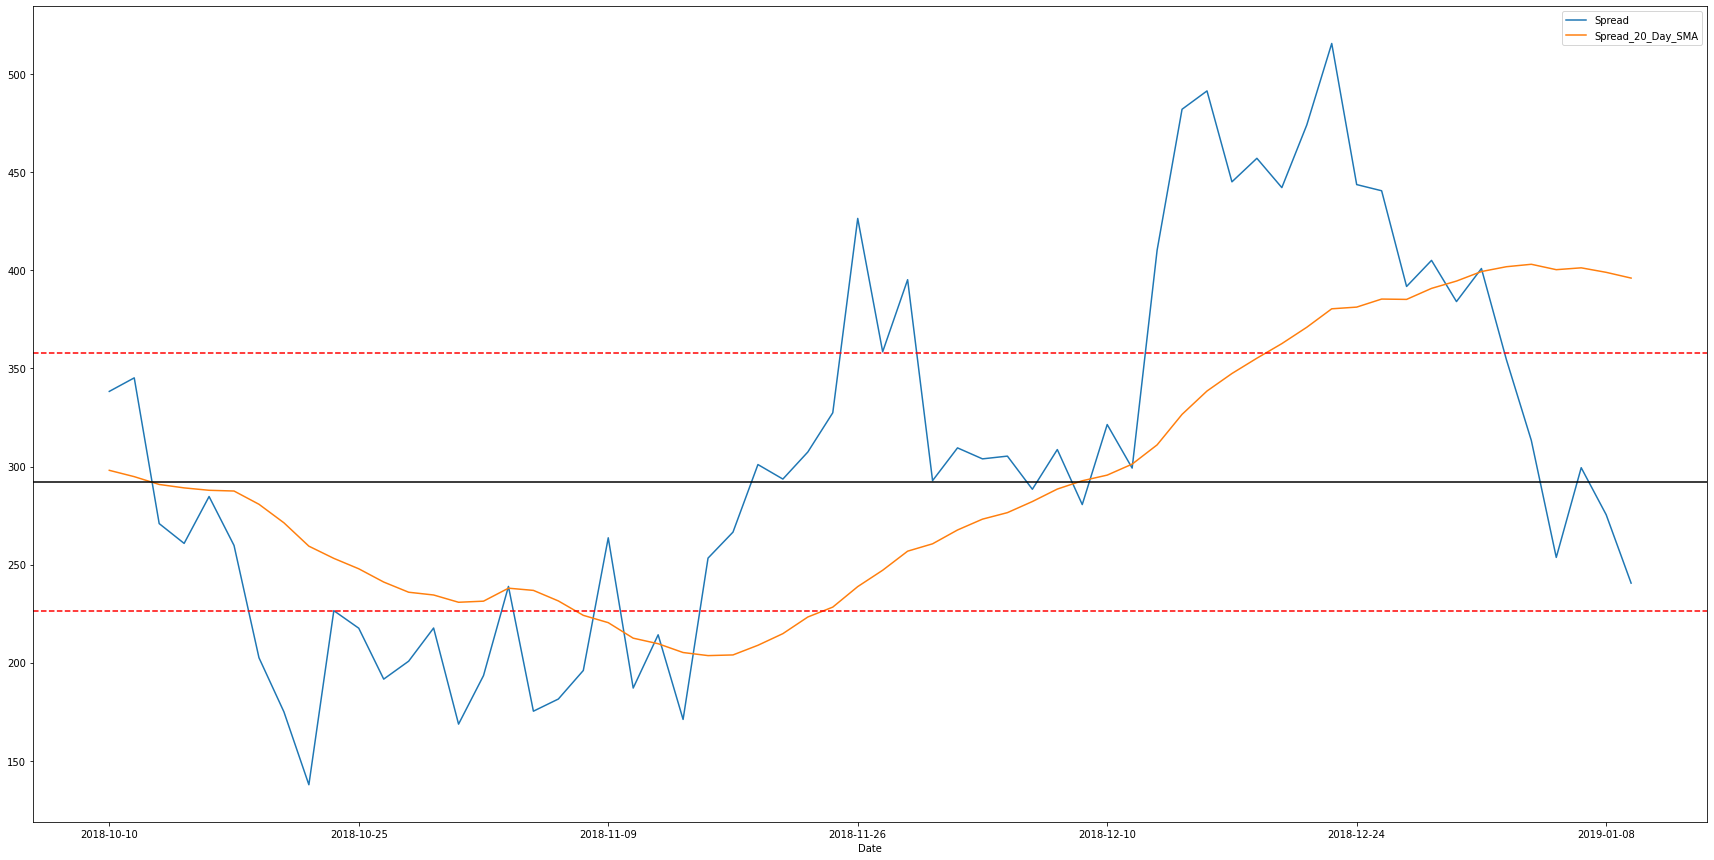

In [25]:
# plot spread and 20 day SMA of spread
pair1_spread_SMA_mean = pair1_df["Spread_20_Day_SMA"].mean()
pair1_spread_SMA_std = pair1_df["Spread_20_Day_SMA"].std()

pair1_spread_plt = pair1_df.plot(x="Date", y=["Spread", "Spread_20_Day_SMA"], figsize=(30,15))

pair1_spread_plt.axhline(pair1_spread_SMA_mean, c='black')
pair1_spread_plt.axhline(pair1_spread_SMA_mean + pair1_spread_SMA_std, c='red', ls = "--")
pair1_spread_plt.axhline(pair1_spread_SMA_mean - pair1_spread_SMA_std, c='red', ls = "--")



In [26]:
# calculation of zscore of 20 day moving average
pair1_df["zscore_Spread_20_day_SMA"] = (pair1_df["Spread"].rolling(1).mean() - pair1_spread_SMA_mean) / pair1_spread_SMA_std
pair1_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA
439,2018-10-10,2920.100098,2581.800049,338.300049,0.397766,298.057483,0.702011
440,2018-10-11,2871.000000,2525.800049,345.199951,0.474415,294.832483,0.806742
441,2018-10-12,2893.949951,2623.050049,270.899902,-0.350959,290.852478,-0.321035
442,2018-10-15,2881.250000,2620.449951,260.800049,-0.463155,289.102478,-0.474337
443,2018-10-16,2895.199951,2610.500000,284.699951,-0.197659,287.879980,-0.111568


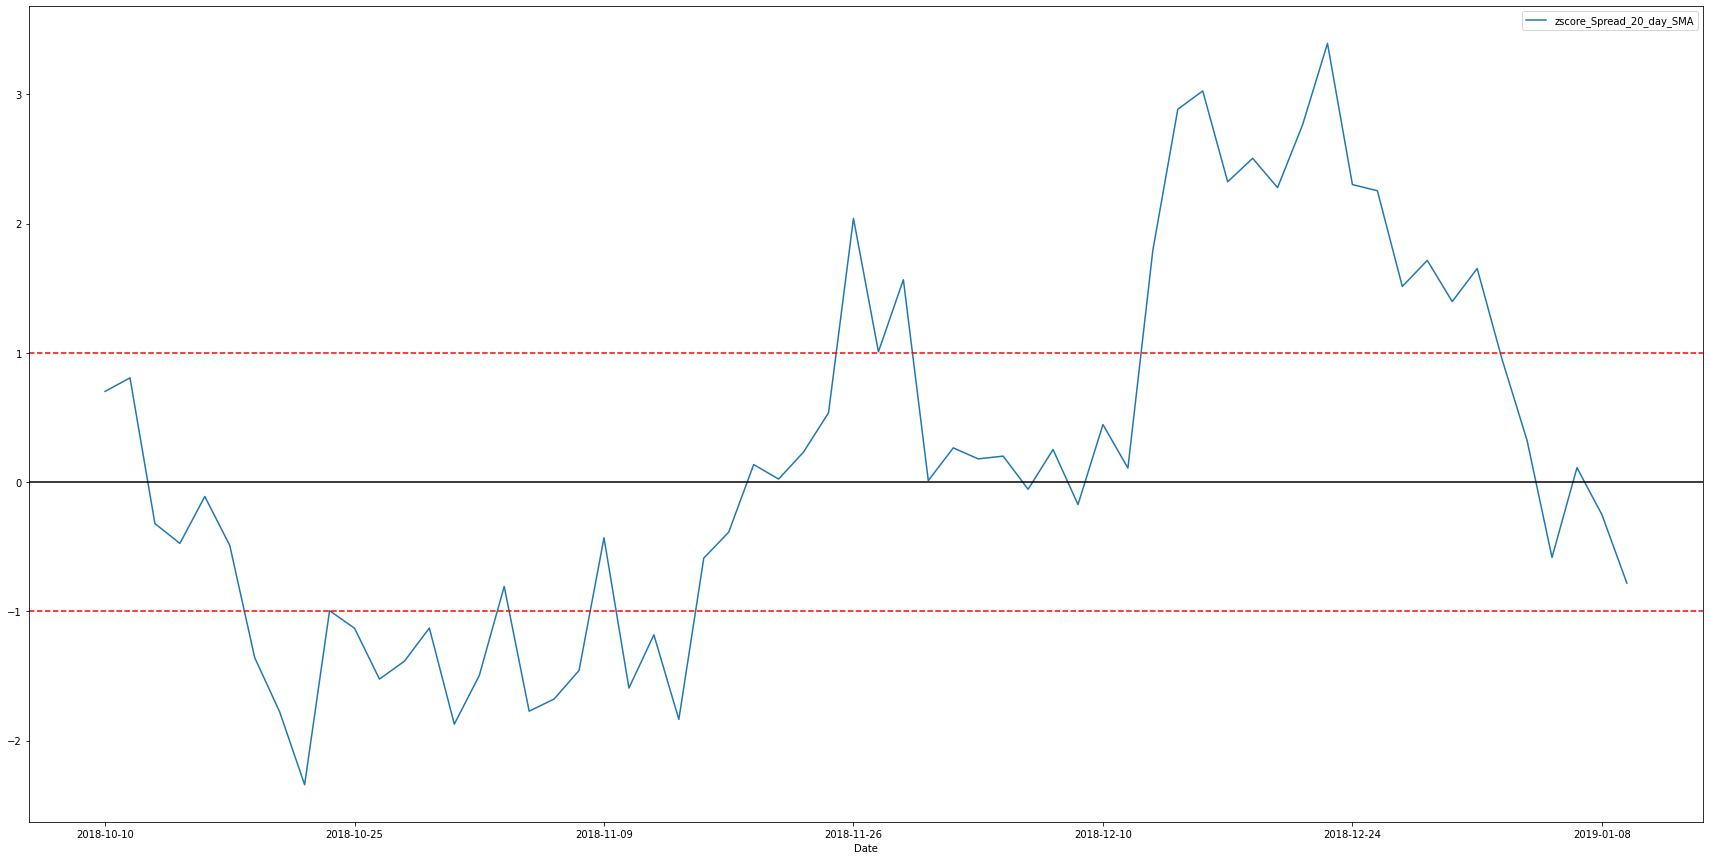

In [27]:
pair1_zscore_Spread_20_day_SMA_plt = pair1_df.plot(x='Date', y='zscore_Spread_20_day_SMA', figsize=(30,15))

pair1_zscore_Spread_20_day_SMA_plt.axhline(0, c='black')
pair1_zscore_Spread_20_day_SMA_plt.axhline(1, c='red', ls = "--")
pair1_zscore_Spread_20_day_SMA_plt.axhline(-1, c='red', ls = "--")


### Generating orders from the zscore of 20 day Simple Moving Average of the spread

In [28]:
# long positions
# short positions
# flat positions
# Get out of a position

def generate_orders(prices):
    
    orders = []
    
    position = "FLAT"
    
    # Keep track of last price
    # prev_price = None
    
    for price in prices:
        
        # Get out of a LONG position
        if position == "LONG" and (price == 0 or price > 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"
            
        # Get out of a SHORT position
        elif position == "SHORT" and (price == 0 or price < 0):
            orders.append("GET_OUT_OF_POSITION")
            position = "FLAT"

        # Get into a long position
        elif price < -1.5:
            position = "LONG"
            orders.append("LONG")

        # Get into a long position
        elif price > 1.5:
            position = "SHORT"
            orders.append("SHORT")

        # Default if no other order is placed
        else:
            orders.append("FLAT")

    return orders


In [29]:
pair1_df["Orders"] = generate_orders(pair1_df["zscore_Spread_20_day_SMA"])
pair1_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA,Orders
439,2018-10-10,2920.100098,2581.800049,338.300049,0.397766,298.057483,0.702011,FLAT
440,2018-10-11,2871.000000,2525.800049,345.199951,0.474415,294.832483,0.806742,FLAT
441,2018-10-12,2893.949951,2623.050049,270.899902,-0.350959,290.852478,-0.321035,FLAT
442,2018-10-15,2881.250000,2620.449951,260.800049,-0.463155,289.102478,-0.474337,FLAT
443,2018-10-16,2895.199951,2610.500000,284.699951,-0.197659,287.879980,-0.111568,FLAT


In [30]:
pair1_df_orders = pair1_df[pair1_df["Orders"] != "FLAT"]
pair1_df_orders

,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA,Orders
446,2018-10-22,2731.800049,2556.899902,174.900146,-1.417389,271.300000,-1.778185,LONG
447,2018-10-23,2724.250000,2586.500000,137.750000,-1.830078,259.387500,-2.342075,LONG
450,2018-10-26,2705.350098,2513.750000,191.600098,-1.231875,241.092505,-1.524701,LONG
453,2018-10-31,2762.350098,2593.699951,168.650146,-1.486818,230.782507,-1.873051,LONG
456,2018-11-05,2847.800049,2672.550049,175.250000,-1.413502,236.842505,-1.772874,LONG
457,2018-11-06,2856.050049,2674.600098,181.449951,-1.344629,231.467505,-1.678767,LONG
460,2018-11-12,2839.350098,2652.300049,187.050049,-1.282420,212.482507,-1.593765,LONG
462,2018-11-14,2847.550049,2676.500000,171.050049,-1.460158,205.160010,-1.836624,LONG
465,2018-11-19,2980.649902,2679.649902,301.000000,-0.016587,208.854993,0.135845,GET_OUT_OF_POSITION
469,2018-11-26,3076.000000,2649.500000,426.500000,1.377550,238.764990,2.040770,SHORT


In [31]:
pair1_df = pair1_df.reset_index(drop=True).set_index("Date")
pair1_df

,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA,Orders
Date,,,,,,,
2018-10-10,2920.100098,2581.800049,338.300049,0.397766,298.057483,0.702011,FLAT
2018-10-11,2871.000000,2525.800049,345.199951,0.474415,294.832483,0.806742,FLAT
2018-10-12,2893.949951,2623.050049,270.899902,-0.350959,290.852478,-0.321035,FLAT
2018-10-15,2881.250000,2620.449951,260.800049,-0.463155,289.102478,-0.474337,FLAT
2018-10-16,2895.199951,2610.500000,284.699951,-0.197659,287.879980,-0.111568,FLAT
...,...,...,...,...,...,...,...
2019-01-03,3014.649902,2701.350098,313.299805,0.120047,403.112512,0.322540,FLAT
2019-01-04,2987.850098,2734.199951,253.650146,-0.542581,400.362524,-0.582863,GET_OUT_OF_POSITION
2019-01-07,2957.949951,2658.550049,299.399902,-0.034362,401.302515,0.111558,FLAT


In [32]:
pair1_df.to_csv("./Pair1_preprocessing_and_orders.csv")